In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
file = "data-120325.csv"
df = pd.read_csv(file)

df_info = df.info
df_head = df.head

types = df.dtypes
names = df.columns.tolist()

null = df.isnull().sum()
duplicate = df.duplicated().sum()

In [ ]:
df_info, df_head

(<bound method DataFrame.info of             Brand                                        Description  \
 0       performax  Typographic Print Track Pants with Insert Pockets   
 1       performax                       Low-Top Lace-Up Sports Shoes   
 2      teamspirit                       Colorblock Crew-Neck T-shirt   
 3       performax       Camouflage Print Joggers with Insert Pockets   
 4      teamspirit           Reflective Colourblock Crew-Neck T-shirt   
 ...           ...                                                ...   
 31577        ajio                    Printed Top with Raglan Sleeves   
 31578        ajio                    Striped Cropped Pants with Belt   
 31579        ajio                      Striped City Shorts with Belt   
 31580        ajio                   Denim Jacket with Frayed Hemline   
 31581        ajio                     Checked Wrap-Around Mini Skirt   
 
                                                Image_URL    Product_ID  \
 0      https:/

31582 dòng, 9 cột

In [ ]:
types, names

(Brand                      object
 Description                object
 Image_URL                  object
 Product_ID                  int64
 Discount_Price (in Rs.)    object
 Original_Price (in Rs.)    object
 Product_URL                object
 Category_by_gender         object
 Category                   object
 dtype: object,
 ['Brand',
  'Description',
  'Image_URL',
  'Product_ID',
  'Discount_Price (in Rs.)',
  'Original_Price (in Rs.)',
  'Product_URL',
  'Category_by_gender',
  'Category'])

In [ ]:
null, duplicate

(Brand                      0
 Description                0
 Image_URL                  0
 Product_ID                 0
 Discount_Price (in Rs.)    0
 Original_Price (in Rs.)    0
 Product_URL                0
 Category_by_gender         0
 Category                   0
 dtype: int64,
 np.int64(564))

Không có giá trị null, 564 giá trị lặp

In [ ]:
df["Original_Price (in Rs.)"] = df["Original_Price (in Rs.)"].str.replace(",", "")
df["Discount_Price (in Rs.)"] = df["Discount_Price (in Rs.)"].str.replace(",", "")

In [ ]:
df["Discount_Price (in Rs.)"] = df["Discount_Price (in Rs.)"].astype(float)
df["Original_Price (in Rs.)"] = df["Original_Price (in Rs.)"].astype(float)
df[["Discount_Price (in Rs.)", "Original_Price (in Rs.)"]]

,Discount_Price (in Rs.),Original_Price (in Rs.)
0,974.0,1299.0
1,1499.0,1499.0
2,461.0,549.0
3,1189.0,1699.0
4,425.0,599.0
...,...,...
31577,1299.0,1299.0
31578,2099.0,2099.0
31579,1499.0,1499.0
31580,2999.0,2999.0


In [ ]:
df["Reduced_Price (in Rs.)"] = df["Original_Price (in Rs.)"] - df["Discount_Price (in Rs.)"]
df["Discount_Percentage"] = round(df["Reduced_Price (in Rs.)"] / df["Original_Price (in Rs.)"] * 100, 2)
df[["Reduced_Price (in Rs.)", "Discount_Percentage"]]

,Reduced_Price (in Rs.),Discount_Percentage
0,325.0,25.02
1,0.0,0.00
2,88.0,16.03
3,510.0,30.02
4,174.0,29.05
...,...,...
31577,0.0,0.00
31578,0.0,0.00
31579,0.0,0.00
31580,0.0,0.00


In [ ]:
stat = round(df[["Original_Price (in Rs.)", "Discount_Price (in Rs.)", "Discount_Percentage"]].describe(), 2)
stat

,Original_Price (in Rs.),Discount_Price (in Rs.),Discount_Percentage
count,31582.00,31582.00,31582.00
mean,1418.09,929.76,32.98
std,945.68,727.21,24.67
min,149.00,75.00,0.00
25%,799.00,479.00,0.00
50%,1299.00,735.00,35.04
75%,1799.00,1199.00,50.93
max,19999.00,16999.00,85.01


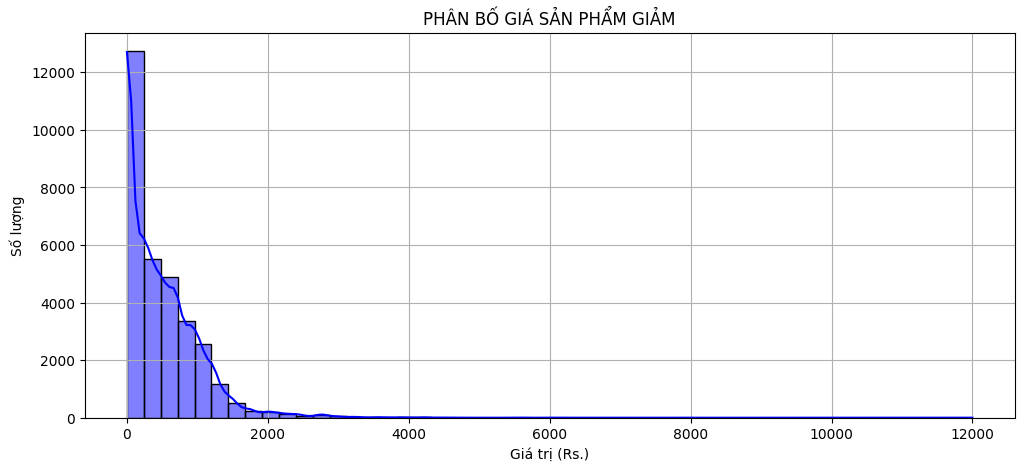

(np.float64(11999.0), np.float64(0.0))

In [ ]:
plt.figure(figsize=(12, 5))
sb.histplot(df['Reduced_Price (in Rs.)'], bins=50, kde=True, color='blue')
plt.title("PHÂN BỐ GIÁ SẢN PHẨM GIẢM")
plt.xlabel("Giá trị (Rs.)")
plt.ylabel("Số lượng")
plt.grid(True)
plt.show()

highest_reduced = df['Reduced_Price (in Rs.)'].max()
lowest_reduced = df['Reduced_Price (in Rs.)'].min()
highest_reduced, lowest_reduced

Biểu đồ mô tả phân bố giá sản phẩm giảm.
Giá sản phẩm giảm từ 0 - 11990 (Rs.)
Sản phẩm giảm nhiều nhất

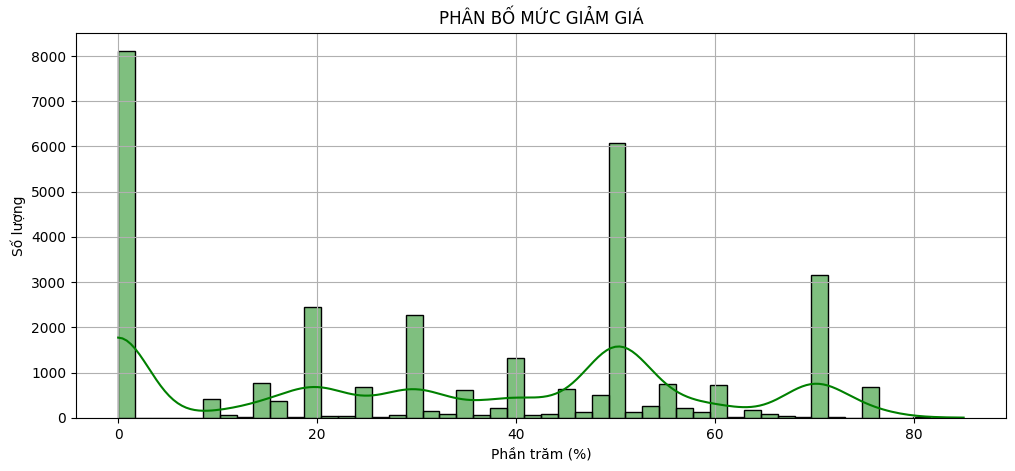

In [ ]:
plt.figure(figsize=(12, 5))
sb.histplot(df['Discount_Percentage'], bins=50, kde=True, color='green')
plt.title("PHÂN BỐ MỨC GIẢM GIÁ")
plt.xlabel("Phần trăm (%)")
plt.ylabel("Số lượng")
plt.grid(True)
plt.show()

AttributeError: 'Series' object has no attribute 'value'

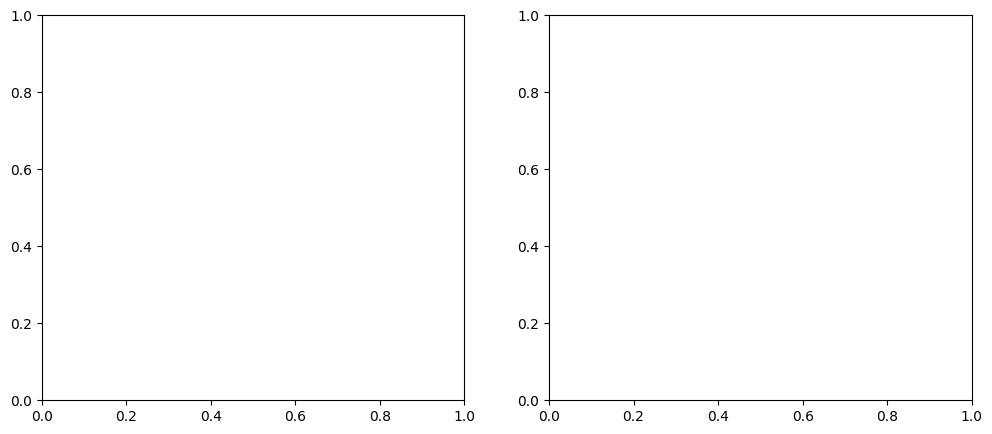

In [ ]:
categories = df["Category"].value_counts().head(10)
brands = df["Brand"].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.barplot(x = categories.value, y = categories.index, ax = axes[0])
axes[0].set_title("Top 10 danh mục sản phẩm phổ biến")
axes[0].set.xlabel("Số lượng sản phẩm")

plt.tight_layout()
plt.show()
